In [3]:
#Dependencies

import math
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [5]:
#Ticker + Data

ticker = 'CRM' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2008-1-1')['Adj Close']

In [6]:
#Deltas
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,CRM
Date,
2018-11-06,-0.011062
2018-11-07,0.056880
2018-11-08,0.000564
2018-11-09,-0.035514
2018-11-12,-0.048024


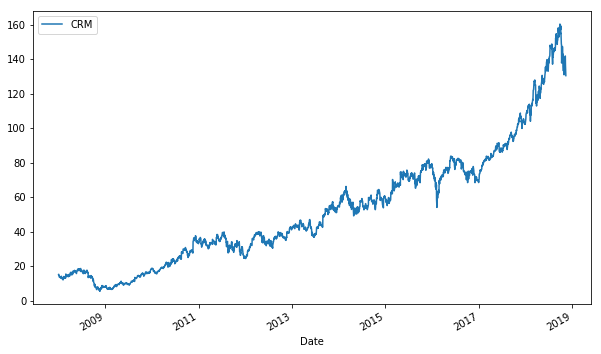

In [7]:
data.plot(figsize=(10, 6));

In [8]:
#Delta_Mean

mu = log_returns.mean()
print(mu)

CRM    0.000789
dtype: float64


In [9]:
#Delta_Variance

stdsquare = log_returns.var()
print(stdsquare)

CRM    0.000664
dtype: float64


In [10]:
#Drift

drift = mu - (0.5 * stdsquare)
print(drift)

CRM    0.000457
dtype: float64


In [11]:
#Delta_Standard Deviation

std = log_returns.std()
print(std)

CRM    0.025761
dtype: float64


In [12]:
#Checking the type Drift is stored as

type(drift)

pandas.core.series.Series

In [13]:
#Checking the type std is stored as
type(std)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.00045717])

In [15]:
drift.values

array([0.00045717])

In [16]:
std.values

array([0.0257611])

In [17]:
#Random Variable
#97.5% Confidence interval.

z = norm.ppf(0.975)
print(z)

1.959963984540054


In [18]:
#Randomization wrt a 10x2 matrix

r = np.random.rand(10, 2)
r

array([[0.74709126, 0.23514985],
       [0.33396657, 0.72714071],
       [0.54220801, 0.15943679],
       [0.22228065, 0.02787603],
       [0.17068533, 0.03862285],
       [0.4972943 , 0.63837058],
       [0.20352001, 0.01967135],
       [0.22841366, 0.52883931],
       [0.43008645, 0.55494327],
       [0.064674  , 0.22200454]])

In [19]:
#Converting the Randomization to in terms of Z score

norm.ppf(r)

array([[ 0.66536435, -0.72199149],
       [-0.42898638,  0.60418812],
       [ 0.10599794, -0.99677533],
       [-0.7645135 , -1.91296865],
       [-0.9514605 , -1.76689573],
       [-0.00678222,  0.35410682],
       [-0.8291138 , -2.06058443],
       [-0.74408125,  0.0723525 ],
       [-0.17615408,  0.13816064],
       [-1.51667803, -0.76544083]])

In [20]:
#Our final Z conversion

Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.00641845,  1.50998587],
       [ 1.04374153,  0.23232617],
       [-1.70398969, -0.14842529],
       [-1.02361369,  0.74364473],
       [ 0.35024597,  1.28953371],
       [ 0.20175595, -1.05677157],
       [-0.58725399,  1.55493937],
       [ 0.36764558, -0.36745827],
       [ 0.10436726, -0.64083272],
       [-1.86468581,  0.37705552]])

In [87]:
#Predicting the next thousand days and creating 10 timelines.

days = 1000
timelines = 10

In [88]:
#Our Daily Returns: Creating a 1000x10 array.

daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(days, timelines)))
print(daily_returns)

[[1.05664969 0.98147965 0.98682254 ... 1.0036456  0.99410408 0.98008103]
 [0.97583475 1.03311125 0.98369342 ... 0.99259705 1.02377417 0.99707465]
 [1.02480948 0.99279291 0.97127284 ... 1.00796463 1.04356874 0.98703502]
 ...
 [0.99455011 0.99640065 0.95220596 ... 1.00182098 1.05011429 1.02404967]
 [1.03459676 1.00364502 1.04392103 ... 1.03643811 0.97833912 0.96323643]
 [1.0303968  0.98422972 0.99995285 ... 0.9791153  1.04773809 0.99357564]]


In [89]:
#The first stock price in our list i.e. the last in our data set; this is since we start from the current date not from the last.

S_0 = data.iloc[-1]
print(S_0)

CRM    130.5
Name: 2018-11-12 00:00:00, dtype: float64


In [90]:
#The list of prices
#zeros_like creates an array of the same dimensions as an existing array full of zeros.

list_of_prices = np.zeros_like(daily_returns)
print(list_of_prices)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [91]:
list_of_prices[0] = S_0
list_of_prices

array([[130.5, 130.5, 130.5, ..., 130.5, 130.5, 130.5],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

In [92]:
for i in range(1, days):
    list_of_prices[i] = list_of_prices[i - 1] * daily_returns[i]

In [93]:
list_of_prices

array([[ 130.5       ,  130.5       ,  130.5       , ...,  130.5       ,
         130.5       ,  130.5       ],
       [ 127.34643455,  134.82101844,  128.37199189, ...,  129.53391475,
         133.60252981,  130.11824145],
       [ 130.50583288,  133.84935091,  124.6842288 , ...,  130.56560416,
         139.42342379,  128.43126057],
       ...,
       [  97.77317935,  946.40479919,  326.55947848, ...,  126.59061091,
        1265.19757416,  253.82746666],
       [ 101.15581432,  949.85445945,  340.90230685, ...,  131.20333374,
        1237.79227524,  244.49586206],
       [ 104.23062755,  934.87498752,  340.88623393, ...,  128.46319152,
        1296.88211196,  242.92513258]])

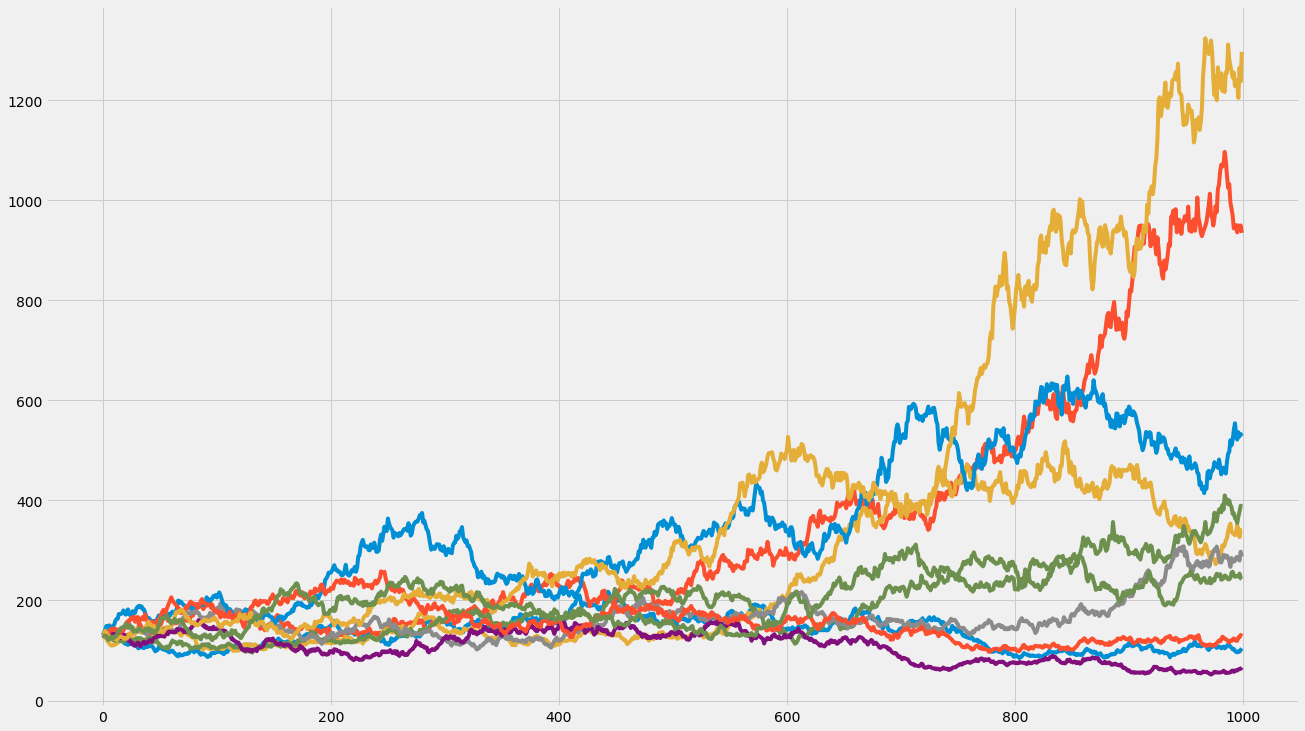

In [94]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,12))
plt.plot(list_of_prices)
plt.savefig("Figures/10.png")
plt.show()